# **ĐỒ ÁN THỰC HÀNH - LẬP TRÌNH CHO KHOA HỌC DỮ LIỆU** 

### Bảng thành viên
|<center><div style="width:150px">MSSV</div><center>|<center><div style="width:290px">Họ và tên</div><center>|
|---------- |:-------------:|
| <center>21120464<center>  | <center>Nguyễn Quốc Hưng<center> |
| <center>21120486<center>  |   <center>Võ Minh Khuê<center>   | 
| <center>21120091<center>  |<center>Hồ Sỹ Kiên<center> |

## Import libraries

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud

## 1. Data collection

### About Dataset
- This dataset is about fatalities in the Israeli-Palestinian conflict from 2000 to 2023.
- Author : Willian Oliveira Gibin and Asaniczka.
- Usability : 10000
- License: CC0: Public Domain

## 2. Data pre-processing and exploration

In [2]:
# Read file csv
fatality_df = pd.read_csv('Data/fatalities_isr_pse_conflict_2000_to_2023.csv')
fatality_df.head(5)

,name,date_of_event,age,citizenship,event_location,event_location_district,event_location_region,date_of_death,gender,took_part_in_the_hostilities,place_of_residence,place_of_residence_district,type_of_injury,ammunition,killed_by,notes
0,'Abd a-Rahman Suleiman Muhammad Abu Daghash,2023-09-24,32.0,Palestinian,Nur Shams R.C.,Tulkarm,West Bank,2023-09-24,M,NaN,Nur Shams R.C.,Tulkarm,gunfire,live ammunition,Israeli security forces,Fatally shot by Israeli forces while standing ...
1,Usayed Farhan Muhammad 'Ali Abu 'Ali,2023-09-24,21.0,Palestinian,Nur Shams R.C.,Tulkarm,West Bank,2023-09-24,M,NaN,Nur Shams R.C.,Tulkarm,gunfire,live ammunition,Israeli security forces,Fatally shot by Israeli forces while trying to...
2,'Abdallah 'Imad Sa'ed Abu Hassan,2023-09-22,16.0,Palestinian,Kfar Dan,Jenin,West Bank,2023-09-22,M,NaN,al-Yamun,Jenin,gunfire,live ammunition,Israeli security forces,Fatally shot by soldiers while firing at them ...
3,Durgham Muhammad Yihya al-Akhras,2023-09-20,19.0,Palestinian,'Aqbat Jaber R.C.,Jericho,West Bank,2023-09-20,M,NaN,'Aqbat Jaber R.C.,Jericho,gunfire,live ammunition,Israeli security forces,Shot in the head by Israeli forces while throw...
4,Raafat 'Omar Ahmad Khamaisah,2023-09-19,15.0,Palestinian,Jenin R.C.,Jenin,West Bank,2023-09-19,M,NaN,Jenin,Jenin,gunfire,live ammunition,Israeli security forces,Wounded by soldiers’ gunfire after running awa...


### 2.0. How many rows/columns are there in the dataset?

In [3]:
# Number of rows and columns
n_rows, n_cols = fatality_df.shape
n_rows, n_cols

(11124, 16)

**Observation** 
* This dataset has 11124 rows and 16 columns.

### 2.1. What is the meaning of each row?
- Each row points out the specific information about the fatality of one person related to the war of Israel and Palestine.

### 2.2. Are there duplicated rows?

In [4]:
duplicate_rows = fatality_df[fatality_df.duplicated()]
duplicate_rows

,name,date_of_event,age,citizenship,event_location,event_location_district,event_location_region,date_of_death,gender,took_part_in_the_hostilities,place_of_residence,place_of_residence_district,type_of_injury,ammunition,killed_by,notes
9373,Name unknown to B'Tselem,2003-01-13,NaN,Palestinian,Nitzana,Israel,Israel,2003-01-13,M,Yes,NaN,NaN,gunfire,NaN,Israeli security forces,Killed by IDF gunfire after he crossed into Is...
9985,Name unknown to B'Tselem,2002-05-05,NaN,Palestinian,Karni Checkpoint,Gaza,Gaza Strip,2002-05-05,NaN,Unknown,NaN,NaN,gunfire,NaN,Israeli security forces,Killed while trying to cross the Gaza perimete...
9986,Name unknown to B'Tselem,2002-05-05,NaN,Palestinian,Kissufim,Khan Yunis,Gaza Strip,2002-05-05,NaN,Yes,NaN,NaN,gunfire,NaN,Israeli security forces,Killed after opening fire at soldiers at the c...
10234,Name unknown to B'Tselem,2002-04-01,NaN,Palestinian,Jenin R.C.,Jenin,West Bank,2002-04-01,NaN,Unknown,NaN,NaN,NaN,NaN,Israeli security forces,"Killed during ""Operation Defensive Shield."""
10817,Name unknown to B'Tselem,2001-12-02,NaN,Palestinian,Jenin,Jenin,West Bank,2001-12-02,NaN,Unknown,NaN,NaN,gunfire,NaN,Israeli security forces,NaN
10818,Name unknown to B'Tselem,2001-12-02,NaN,Palestinian,Jenin,Jenin,West Bank,2001-12-02,NaN,Unknown,NaN,NaN,gunfire,NaN,Israeli security forces,NaN
10824,Name unknown to B'Tselem,2001-12-02,NaN,Palestinian,Jenin,Jenin,West Bank,2001-12-02,NaN,Unknown,NaN,NaN,gunfire,NaN,Israeli security forces,NaN


In [5]:
#Drop duplicated rows
fatality_df = fatality_df.drop_duplicates()

#Check again
duplicate_rows = fatality_df[fatality_df.duplicated()]
num_duplicates = duplicate_rows.shape[0]
if num_duplicates == 0:
    print(f'There isn\'t any duplicated rows in the dataset.')

There isn't any duplicated rows in the dataset.


### 2.5. What is the meaning of each column?

|No.| Column Name | <center>Description<center> ||
|--|------| ---| --- |
|1|name|Name of the casualty|
|2|date_of_event|Specific date that the casualty happened|
|3|age|Age of the casualty|
|4|citizenship|Nationality of the casualty|
|5|event_location|Specific location or name of an event| 
|6|event_location_district|The district where the event took place| 
|7|event_location_region| the general geographical region where the event occurred|
|8|date_of_death|The date that the person died since the date_of_event|
|9|gender|Gender of the casualty| 
|10|took_part_in_the_hostilities| Did the casualty join the war?(Civilians or not?)| 
|11|place_of_residence|Specifies the specific place associated with the residence of the casualty.| 
|12|place_of_residence_district|Indicates the district associated with the place of the casualty.| 
|13|type_of_injury|The way that the casualty was injured or killed| 
|14|ammunition|Describes the type of ammunition associated with casualties| 
|15|killed_by|Force that made the casualty to the person in this row|
|16|notes|More information about the casualty| 

### 2.6. What is the current data type of each column?

In [6]:
len(fatality_df['name'])

11117

In [7]:
fatality_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11117 entries, 0 to 11123
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   name                          11117 non-null  object 
 1   date_of_event                 11117 non-null  object 
 2   age                           10995 non-null  float64
 3   citizenship                   11117 non-null  object 
 4   event_location                11117 non-null  object 
 5   event_location_district       11117 non-null  object 
 6   event_location_region         11117 non-null  object 
 7   date_of_death                 11117 non-null  object 
 8   gender                        11103 non-null  object 
 9   took_part_in_the_hostilities  9687 non-null   object 
 10  place_of_residence            11056 non-null  object 
 11  place_of_residence_district   11056 non-null  object 
 12  type_of_injury                10827 non-null  object 
 13  a

### 2.7. Handle missing data & Convert data
- As we can see, the values missing rate of `ammunition` is approximately 50%. We can consider removing this column.
- By observing the result of `.info()`, there are some columns that need to be converted:
  - `date_of_event`, `date_of_death`: `Datetime`

### 2.7. With each numerical column, how are values distributed?

### 2.8. With each categorical column, how are values distributed?

In [8]:
# The meaning of each column?

In [9]:
# Analyzing the distribution 
fatality_df.describe(include="all")

,name,date_of_event,age,citizenship,event_location,event_location_district,event_location_region,date_of_death,gender,took_part_in_the_hostilities,place_of_residence,place_of_residence_district,type_of_injury,ammunition,killed_by,notes
count,11117,11117,10995.000000,11117,11117,11117,11117,11117,11103,9687,11056,11056,10827,5871,11117,10840
unique,11083,2405,NaN,4,494,20,3,2593,2,5,580,20,13,21,3,6744
top,Name unknown to B'Tselem,2008-12-27,NaN,Palestinian,Gaza City,Gaza,Gaza Strip,2008-12-27,M,No,Gaza city,Gaza,gunfire,missile,Israeli security forces,"Killed during ""Operation Defensive Shield."""
freq,16,357,NaN,10085,2232,2434,7731,341,9680,4653,2283,2453,9843,2877,9993,112
mean,NaN,NaN,26.745703,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,13.780548,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,19.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,23.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,31.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
# Selecting numerical columns,
numerical_columns = fatality_df.select_dtypes(include=['int64', 'float64']).columns

# Calculate the percentage of missing values
missing_percentage_numerical = fatality_df[numerical_columns].isnull().mean() * 100

# Calculate min and max
min_values = fatality_df[numerical_columns].min()
max_values = fatality_df[numerical_columns].max()

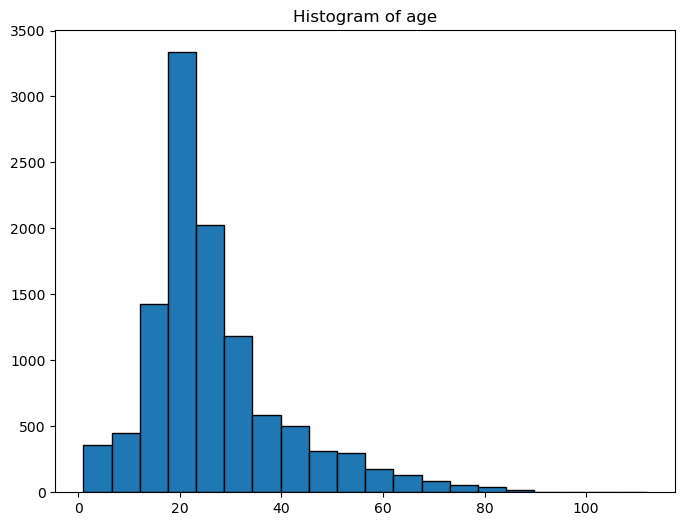

In [11]:
# Histogram for each column of numbericals
for column in numerical_columns:
    plt.figure(figsize=(8, 6))
    plt.hist(fatality_df[column].dropna(), bins=20, edgecolor='black')
    plt.title(f'Histogram of {column}')
    plt.show()

In [12]:
# Abnormal?

In [13]:
# Selecting categorical columns
categorical_columns = fatality_df.select_dtypes(include=['object']).columns

# Calculate the percentage of missing values
missing_percentage_categorical = fatality_df[categorical_columns].isnull().mean() * 100

# Number of unique values in each categorical column
num_unique_values =  fatality_df[categorical_columns].nunique()

# Show a few unique values for each categorical column
for column in categorical_columns:
    unique_values = fatality_df[column].unique()[:5] 
    print(f"Unique values for {column}: {unique_values}")
    print("\n")

Unique values for name: ["'Abd a-Rahman Suleiman Muhammad Abu Daghash"
 "Usayed Farhan Muhammad 'Ali Abu 'Ali" "'Abdallah 'Imad Sa'ed Abu Hassan"
 'Durgham Muhammad Yihya al-Akhras' "Raafat 'Omar Ahmad Khamaisah"]


Unique values for date_of_event: ['2023-09-24' '2023-09-22' '2023-09-20' '2023-09-19' '2023-09-09']


Unique values for citizenship: ['Palestinian' 'Israeli' 'Jordanian' 'American']


Unique values for event_location: ['Nur Shams R.C.' 'Kfar Dan' "'Aqbat Jaber R.C." 'Jenin R.C.' 'Gaza City']


Unique values for event_location_district: ['Tulkarm' 'Jenin' 'Jericho' 'Gaza' 'Hebron']


Unique values for event_location_region: ['West Bank' 'Gaza Strip' 'Israel']


Unique values for date_of_death: ['2023-09-24' '2023-09-22' '2023-09-20' '2023-09-19' '2023-09-09']


Unique values for gender: ['M' 'F' nan]


Unique values for took_part_in_the_hostilities: [nan 'No' 'Yes' 'Unknown' 'Israelis']


Unique values for place_of_residence: ['Nur Shams R.C.' 'al-Yamun' "'Aqbat Jaber R.C." 

In [14]:
# Abnormal?

#### Question 5: What is the distribution of fatalities based on citizenship? How has the distribution of fatalities among different citizenship groups changed over the years of the conflict?

**Benefits of answering this question:** Understanding the distribution of fatalities based on citizenship in the Israel-Palestine conflict and tracking changes over time offers invaluable insights. Such as raises public awareness, aids academic research, and underscores the need for nuanced approaches to address the complexities of the conflict.

Preprocessing:
1. Make a copy of Dataframe to avoid conflicts and create a column named year from column `date_of_event`.
2. Group the dataset by `citizenship` then find out the distribution of fatalities based on citizenship.
3. Based on column named year, group dataset by this column and count value of each citizenship to attain the number of fatalities of each year. Save the result to dictionaries that the number of dictionaries corresponds to the number of unique citizenship in this dataset.

In [15]:
fatality_df['date_of_event'] = pd.to_datetime(fatality_df['date_of_event'])
df_copy = fatality_df.copy()

In [16]:
citizenship_counts = df_copy['citizenship'].value_counts()
citizenship_counts

Palestinian    10085
Israeli         1029
Jordanian          2
American           1
Name: citizenship, dtype: int64

In [17]:
df_copy['year'] = df_copy['date_of_event'].dt.year
num_of_fatalities = df_copy.groupby('year')['citizenship'].value_counts().to_dict()

palestine = {}
israel = {}
jordan = {}
america = {}

for (year,citizenship),value in num_of_fatalities.items():
    if citizenship == 'Palestinian':
        palestine[year] = value
    if citizenship == 'Jordanian':
        jordan[year] = value
    if citizenship == 'Israeli':
        israel[year] = value
    if citizenship == 'American':
        america[year] = value
print('Palestinian:')
print(palestine)
print('Israeli: ')
print(israel)
print('Jordanian: ')
print(jordan)
print('American: ')
print(america)

Palestinian:
{2000: 6, 2001: 189, 2002: 1031, 2003: 586, 2004: 829, 2005: 190, 2006: 665, 2007: 385, 2008: 885, 2009: 1036, 2010: 82, 2011: 117, 2012: 256, 2013: 38, 2014: 2272, 2015: 157, 2016: 107, 2017: 69, 2018: 295, 2019: 136, 2020: 28, 2021: 316, 2022: 187, 2023: 223}
Israeli: 
{2000: 29, 2001: 161, 2002: 291, 2003: 146, 2004: 99, 2005: 44, 2006: 19, 2007: 10, 2008: 30, 2009: 9, 2010: 7, 2011: 12, 2012: 5, 2013: 3, 2014: 59, 2015: 20, 2016: 8, 2017: 7, 2018: 7, 2019: 9, 2020: 2, 2021: 9, 2022: 17, 2023: 26}
Jordanian: 
{2014: 1, 2022: 1}
American: 
{2016: 1}


Analysis:
  - `Convert` keys of `palestine(or israel)` to list. Since `palestine(or israel)` has `full` years from 2000 to 2023, the others have missing keys so we don't choose them.
  - `Create` 4 lists named `'valueX'` by retrieving the values corresponding to each year from each dictionary. If the year is not present in the dictionary, it assigns `None` to the corresponding position in the list.
  - `Plot` 2 chart in one figure using `subplots(1 row, 2 cols)`.
- `Plot a line graph`: each line corresponds to each color that noted in the legend. Then observe the changes in the trends of fatalities among the countries and give a conclusion about them.
- `Plot a pie chart` from above result. Point out the distribution of each country. Finally, find out which country has the most number of fatalities ever before.

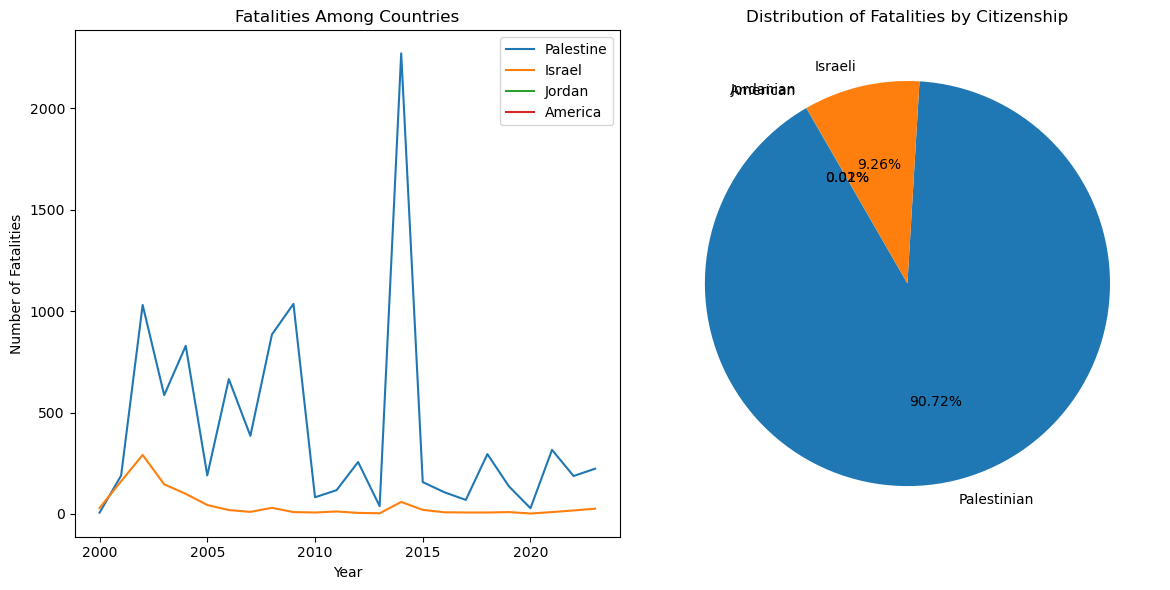

In [18]:
years = list(palestine.keys())
values1 = [palestine.get(year, None) for year in years]
values2 = [israel.get(year, None) for year in years]
values3 = [jordan.get(year, None) for year in years]
values4 = [america.get(year, None) for year in years]

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# line chart
ax1.plot(years, values1, label='Palestine')
ax1.plot(years, values2, label='Israel')
ax1.plot(years, values3, label='Jordan')
ax1.plot(years, values4, label='America')

# Add title and legend
ax1.set_title('Fatalities Among Countries')
ax1.set_xlabel('Year')
ax1.set_ylabel('Number of Fatalities')
ax1.legend()

# pie chart
ax2.pie(citizenship_counts, labels=citizenship_counts.index, autopct='%1.2f%%', startangle=120)
ax2.set_title('Distribution of Fatalities by Citizenship')

plt.tight_layout()
plt.show()

Conclusion: 
- From the pie chart, we can see that the majority of the dead are `Palestinians`, representing 90.72% of the total dead whereas fatalities of Israeli only at 9.26%.
- As the line graph shows, the casualties of Palestine are always `greater` than the ones of Israel.
- The trend:
  - A sharp `increase` in deaths happened around 2002.
  - After 2002, the number of deaths went `down`, hitting a `low` point in 2005.
  - From 2005 to 2008, there was another `rise` in deaths.
  - After 2008, deaths `decreased` and `stayed fairly` steady until around 2013.
  - The `highest` number of deaths occurred in 2014.
  - Between 2018 and 2023, we're seeing a `gradual increase` in fatalities.

#### Question 6: Among the casualities, whether the number of people who took part in hostilities are greater than those who did nothing or not? If not, who account for the majority in the fatalities? Analyze the relationships associated with this group.
- **Benefits of answering this question:**
  - `Targeted Aid`: Helps direct aid and resources to the group that needs it most.
  - `Conflict Resolution`: Informs strategies for resolving conflicts by understanding who is most affected.
  - `International Attention`: Draws international attention to the specific group facing the greatest impact, encouraging support and intervention.
  - `Policy Development`: Helps policymakers create targeted policies for protecting specific vulnerable groups.

Preprocessing:
1. Make a copy of Dataframe to avoid conflicts and create a column named year from column `date_of_event`.
2. Group the dataset by `took_part_in_the_hostilities` then find out the distribution of fatalities based on hostility participation.

In [19]:
df_copy = fatality_df.copy()
participation = df_copy['took_part_in_the_hostilities'].value_counts().to_dict()
participation

{'No': 4653,
 'Yes': 3465,
 'Israelis': 771,
 'Unknown': 598,
 'Object of targeted killing': 200}

Analysis:
- Plot a bar chart from `participation`. Point out the distribution of fatalities of each group. Finally, find out which group has the most number of fatalities ever before.
  - `Convert` keys and values of this dictionary into list for visualization.
  - `Plot bars` and a for loop to `note values` on the top of each bar.
  - `Set` x and y-axis label, `title` for the first chart.
- Plot a pie chart from `participation`: to help us observe more clearly from the bar chart by pointing out the proportion of each group.

/tmp/ipykernel_4704/589103992.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(groups, rotation=45)


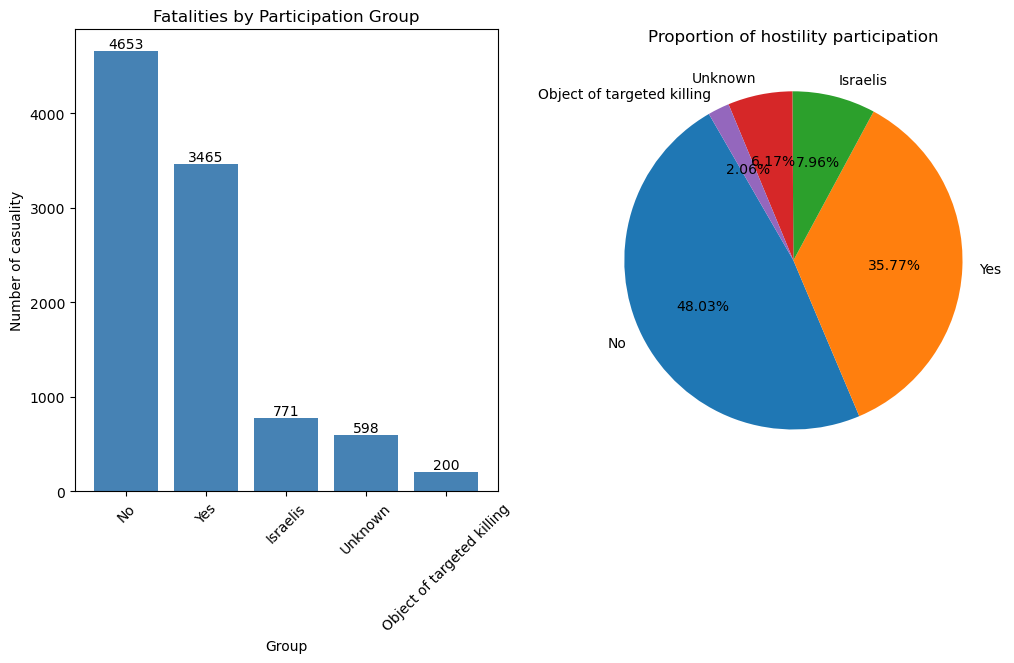

In [20]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))
groups = list(participation.keys())
numbers = list(participation.values())


bars = ax1.bar(groups, numbers, color='steelblue')
ax1.set_xlabel('Group')
ax1.set_ylabel('Number of casuality')
ax1.set_title('Fatalities by Participation Group')
ax1.set_xticklabels(groups, rotation=45)

# Display values on top of the bars
for bar, num in zip(bars, numbers):
    ax1.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), str(num),
             ha='center', va='bottom')


ax2.pie(numbers,labels=groups, autopct='%1.2f%%', startangle=120)
ax2.set_title('Proportion of hostility participation')

plt.show()

- As two above charts show, the group of casualities that `did not participate` in the war is the most `greatest`. Let's go deeper to explore the impacts on this group.
- Preprocessing:
  - Make a copy dataset from origin dataset.
  - Filter the non-participated casualities by filtering `No` values in `took_part_in_the_hostilities` column.
  - Task 1: Manipulate `killed_by` column to find out the `main factors` to the deaths of this group.  - Task 2: Manipulate `notes` column to attain some `major keywords` related to their deaths.


In [21]:
df_copy = fatality_df.copy()
non_participated_casualties = df_copy[df_copy['took_part_in_the_hostilities'] == 'No']
killed_by = df_copy['killed_by'].value_counts().to_dict()
temp = {}
for key, value in killed_by.items():
    if 'Israeli' in key:
        temp['Israeli'] = temp.get('Israeli', 0) + value
    else:
        temp['Palestinian'] = value
killed_by = temp
killed_by

{'Israeli': 10089, 'Palestinian': 1028}

Analysis:
- Plot a bar chart from `killed_by`: Visualize the number of people killed by 2 forces(Israel and Palestine-Hamas) to give the observation which side caused more deaths.
- `Convert` keys and values of this dictionary into list for visualization.
- `Plot bars` and a for loop to `note values` on the top of each bar.
- `Set` x and y-axis label, `title` and `show`.

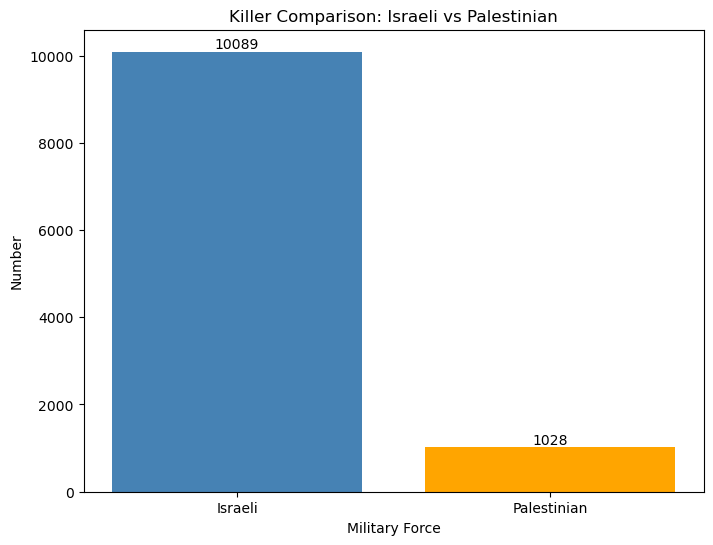

In [24]:
groups = list(killed_by.keys())
numbers = list(killed_by.values())
fig, ax = plt.subplots(figsize=(8, 6))
bars = ax.bar(groups, numbers, color=['steelblue', 'orange'])

for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, yval, int(yval), ha='center', va='bottom')

ax.set_xlabel('Military Force')
ax.set_ylabel('Number')
ax.set_title('Killer Comparison: Israeli vs Palestinian')

plt.show()

Analysis:
- From `non_participated_casualties`, we choose `notes` column to do this step.
- First, we concatenate all the text data in the `notes` column of the non_participated_casualties DataFrame into a single string. Then set the background color for the word cloud to `white`.
- Create a `WordCloud` object with specified parameters such as width, height, background color, and font size range.
- Plot the word cloud using the `imshow` function from `Matplotlib` with `bilinear interpolation`.
- Finally, `remove` x and y-axis sticks, `set` title and `show` the plot.

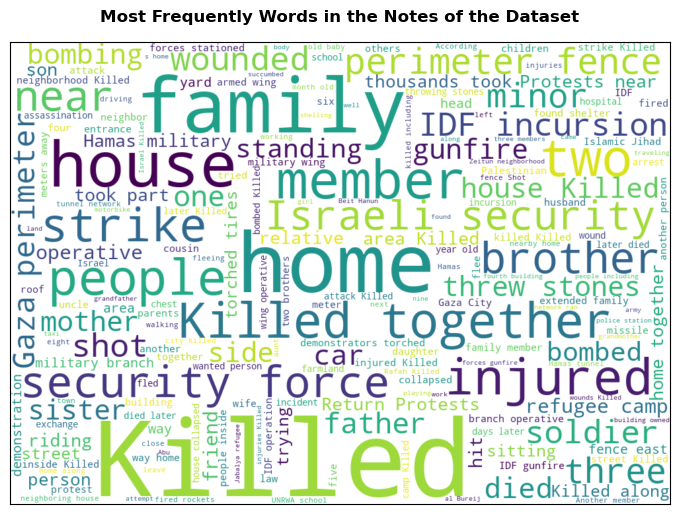

In [23]:
# Set comment words
cloud_of_words = ''.join(non_participated_casualties['notes'].astype(str))

facecolor = 'white'
wordcloud = WordCloud(width=1000, height=700,background_color=facecolor, min_font_size=10, max_font_size=160).generate(cloud_of_words)

## Plot the World Cloud image
plt.figure(figsize=(12,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.xticks([]), plt.yticks([])
plt.title('Most Frequently Words in the Notes of the Dataset', weight='bold', fontsize=12, pad=15)
plt.show()

Conclusion:
- The people who `did not participate` in the war were killed the most.
- The `Israel military force` is the main factor that put thousands of innocents to the sword.
- The `Killed` word implies that almost these casualities were killed, not naturally died. Moreover:
  - `Killed together` means they were killed together with their `family`(`brother`, `mother`, `father`, `parents`, `wife`,...), `friend`,...
  - Some were killed during the enemy's `incursion`, some were killed while `standing`, driving `car` or `riding`.
  - Casualities were killed by `bombing`, `gunfire`, `strike`,...